<a href="https://colab.research.google.com/github/SujoyDaniel/GoogleCob/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = logisticregression.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0]


In [9]:
y_compare = np.vstack((y_test, y_pred)).T

In [10]:
y_compare[:5, :]

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  6]
 [ 7 19]]


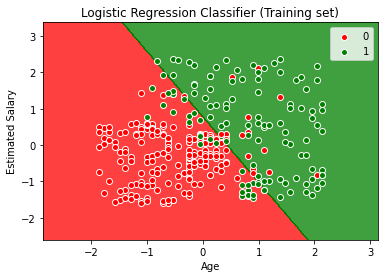

In [12]:
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max(
) + 1, step=0.01), np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

probs = logisticregression.predict(
    np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(
        ('red', 'green'))(i), label=j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


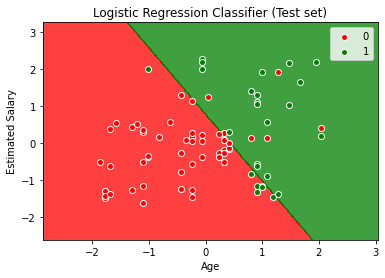

In [13]:
X_set, y_set = X_test, y_test
X, Y = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max(
) + 1, step=0.01), np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

probs = logisticregression.predict(
    np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(
	    ('red', 'green'))(i), label=j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()